## This takes info from `extract_confouts_for_FES` and analyzes each as their own traj.

Loosely based on `old_string_analysis/FES_minima_confout_analysis`

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import seaborn as sns
from MDAnalysis.analysis import rms
import pandas as pd
from MDAnalysis.analysis import distances as d

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


First thing is just to define what wells we have for each sim. You can put whatever you would like here.

You can follow along in Notion to see what states are named what

In [2]:
condition='influx_BFRU_gate_CV'

if condition == 'influx_BFRU_gate_CV':
    states = {'out_open': [2169, 2170, 2223, 2224, 2277, 2278],\
              'out_occluded':[1631, 1632, 1685, 1686]
             }

In [2]:
states_uni = {'out_open': mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.wholesys.tpr',
                       '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2169/FES_grid_all.xtc',\
                       '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2170/FES_grid_all.xtc',\
                       '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2223/FES_grid_all.xtc',\
                       '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2224/FES_grid_all.xtc',\
                       '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2277/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_2278/FES_grid_all.xtc',
                        )
             ,
              
              'out_occluded':mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.wholesys.tpr',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_1631/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_1632/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_1685/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_1686/FES_grid_all.xtc',
                                             )
              ,
              
              'pre_occluded':mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.wholesys.tpr',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_816/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_817/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_870/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_871/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_924/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_925/FES_grid_all.xtc'
                                             )
              
              ,
              
              'in_occluded_high':mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.wholesys.tpr',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_676/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_677/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_678/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_730/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_731/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_732/FES_grid_all.xtc'
                                             )
              ,
              
              
              'in_occluded_low':mda.Universe('../confout_files/tpr_files/influx_BFRU_gate_CV.wholesys.tpr',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_298/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_299/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_352/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_353/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_406/FES_grid_all.xtc',\
                        '../confout_files/FES_grids_confouts/influx_BFRU_gate_CV/histogram_407/FES_grid_all.xtc'
                                            )
               
              
              
             }

## this is in occ low for now

In [8]:
indir='../../../GLUT5_atomistic/analysis/input_f/whole_systems'
atom_sims_uni = {'out_open':mda.Universe(f'{indir}/GLUT5_out.start.gro',\
                                         f'{indir}/GLUT5_out.xtc'),
                 
                 'out_occluded':mda.Universe(f'{indir}/GLUT5_out_occ.start.gro',\
                                             f'{indir}/GLUT5_out_occ.xtc'),
                 
                 'occluded':mda.Universe(f'{indir}/GLUT5_occ.start.gro',\
                                        f'{indir}/GLUT5_occ.xtc'),
                 
                 'in_occluded':mda.Universe(f'{indir}/GLUT5_in_occ.start.gro',\
                                           f'{indir}/GLUT5_in_occ.xtc'),
                 
                 'in_open':mda.Universe(f'{indir}/GLUT5_in.start.gro',\
                                       f'{indir}/GLUT5_in.xtc')
                }


indir = '../ref_models_protonly/'
atom_strs_uni = {'out_open':mda.Universe(f'{indir}/OUT.start.protonly.gro'),
                 
                 'out_occluded':mda.Universe(f'{indir}/OUT-OCC.start.protonly.gro'),
                 
                 'occluded':mda.Universe(f'{indir}/OCC.start.protonly.gro'),
                 
                 'in_occluded':mda.Universe(f'{indir}/IN-OCC.start.protonly.gro'),
                 
                 'in_open':mda.Universe(f'{indir}/IN.start.protonly.gro')
                }


In [22]:
def theta_of_angle(u, s1, s2, s3):
    A = u.select_atoms(s1).center_of_geometry()
    B = u.select_atoms(s2).center_of_geometry()
    C = u.select_atoms(s3).center_of_geometry()

    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)


def get_angle(u, skip, set_name='set1', backbone = True):
    ## preprocessing
    if backbone:
        backbone = ' and name CA'
    else:
        backbone = ''
    
    sets_sels = {'set1':['283-285', '290-292', '298-300'],\
                 'set2':['284', '291', '299']
                }
    sels = sets_sels[set_name]
    
        
    theta_u = []
    for ts in u.trajectory[::skip]:
        theta = theta_of_angle(u, s1 = f'resid {sels[0]}{backbone}', 
                        s2 = f'resid {sels[1]}{backbone}', 
                        s3 = f'resid {sels[2]}{backbone}')

        theta_u.append(theta)        

    return theta_u


def get_TM10_RMSD(u, skip, backbone=True): 
    # let's keep the same ref here as used in the histo analysis
    ref = mda.Universe('../textfiles_out/TM10_RMSD/testing_RMSD/OUT.start.gro')
    if backbone:
        selection='backbone'
    else:
        selection='resid 365-395'
        
        

    R = rms.RMSD(reference = ref, 
            atomgroup = u, 
            select = selection, 
            center = True, 
            groupselections = ['resid 385-395']
           )
        
    R.run(step=skip)
    rmsd = R.rmsd

        
    return rmsd[:,3]


def get_salt_br(u, skip):
    
    ## first bridge
    bridge1 = []
    bridge2 = []
    
    bridge1_res1 = u.select_atoms('resid 145 and resname GLU and name OE1 OE2')
    bridge1_res2 = u.select_atoms('resid 401 and resname ARG and name NE HE NH1 NH2 HH11 HH12 HH21 HH22')  
    #R401 for state dependent, 91 for always
        
    bridge2_res1 = u.select_atoms('resid 394 and resname GLU and name OE1 OE2')
    bridge2_res2 = u.select_atoms('resid 152 and resname ARG and name NE HE NH1 NH2 HH11 HH12 HH21 HH22') 
    #R152 for state dependent, R334 for always
    #print('this is currently state dependent')
    
    for ts in u.trajectory[::skip]:
        bridge1.append(np.min(d.distance_array(bridge1_res1.positions, bridge1_res2.positions)))
        bridge2.append(np.min(d.distance_array(bridge2_res1.positions, bridge2_res2.positions)))
    
    bridge1 = np.array(bridge1)
    bridge2 = np.array(bridge2)
    
    #return bridge2#, bridge2
    bridges = np.vstack((bridge1, bridge2))
    bridges = np.mean(bridges, axis=0)
    return bridges


In [23]:
def plot_violin(uni_dict, function, ax, skip):
    features = []
    labels = []
    for n, key in enumerate(uni_dict.keys()):
        feature = function(u=uni_dict[key], skip = skip)
        features.append(feature)
        labels.append(np.zeros(len(feature))+n)
    
    x=np.concatenate(labels)
    y=np.concatenate(features)

    
    sns.violinplot(x=x,y=y,ax=ax)
    ax.set_xticklabels(uni_dict.keys())
    

# Atomistic simulation violinplots

Just loop through each atom sim

out_open [1.87317492]
out_occluded [2.46393221]
occluded [1.98813778]
in_occluded [7.10969815]
in_open [10.34945989]


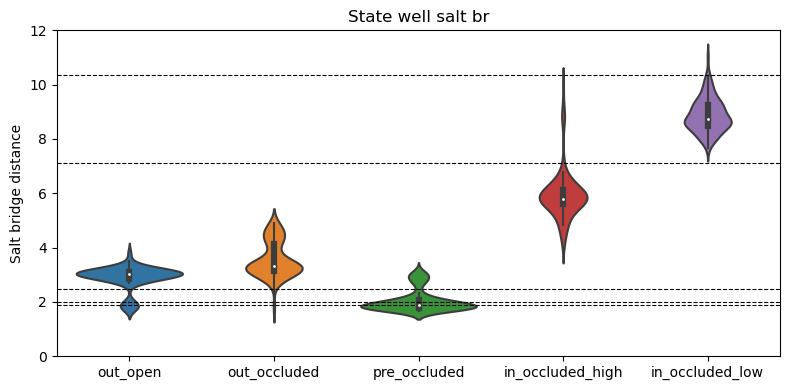

In [26]:
f,ax=plt.subplots(nrows=1,ncols=1, figsize=(8,4))


#ylim=(70,160)
ylim=(0,12)
plot_violin(uni_dict=states_uni, function=get_salt_br, ax=ax, skip = 50)
ax.set_ylabel('Salt bridge distance')
ax.set_title('State well salt br')
ax.set_ylim(ylim)
xlim=(-0.5 , len(states_uni.keys())-0.5)
ax.set_xlim(xlim)

for structure in atom_strs_uni.keys():
    structure_feature = get_salt_br(atom_strs_uni[structure], skip=1)
    ax.hlines(xmin=xlim[0], xmax=xlim[1],y=structure_feature[0], \
              color='black',linestyle='--', linewidth=0.8)
    print(structure, structure_feature)
    plt.tight_layout()


## Compare states side-by-side to homology model sims

May want to drop some things from state_uni dict

In [142]:
states_uni['in_occluded'] = states_uni['in_occluded_high']

In [143]:
del states_uni['in_occluded_high']
del states_uni['in_occluded_low']
del states_uni['pre_occluded']

In [144]:
states_uni

{'out_open': <Universe with 106049 atoms>,
 'out_occluded': <Universe with 106049 atoms>,
 'in_occluded': <Universe with 106049 atoms>}

In [145]:
def get_grouped_dataframe(function, skip):
    
    ## atom sims first
    angles_dict = {}
    for sim in atom_sims_uni.keys():
        angles_dict[sim]=function(atom_sims_uni[sim], skip=skip)

    atom_df = pd.DataFrame.from_dict(angles_dict, orient='index')
    atom_df = atom_df.transpose()
    atom_df = pd.melt(atom_df)   
    atom_df = atom_df.assign(sim = 'homology model')
    
    
    
    ## then grids
    angles_dict = {}
    for sim in states_uni.keys():
        angles_dict[sim]=function(states_uni[sim], skip=skip)

    grid_df = pd.DataFrame.from_dict(angles_dict, orient='index')
    grid_df = grid_df.transpose()
    grid_df = pd.melt(grid_df)
    grid_df = grid_df.assign(sim = 'FES minima confouts')
    
    
    
    ## now combine
    both_df = pd.concat((atom_df,grid_df))
    
    return both_df  
    

In [146]:
#TM10_both_df = get_grouped_dataframe(function=get_TM10_RMSD, skip=2)
#TM7_both_df = get_grouped_dataframe(function=get_angle, skip=2)
salt_bridge_both_df = get_grouped_dataframe(function=get_salt_br, skip=2)

<AxesSubplot: xlabel='variable', ylabel='value'>

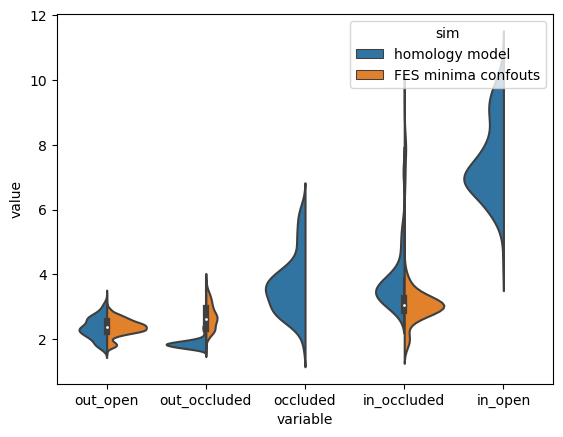

In [148]:
sns.violinplot(data=salt_bridge_both_df, x='variable', y='value', hue='sim', split=True, )

Text(0.5, 0, '')

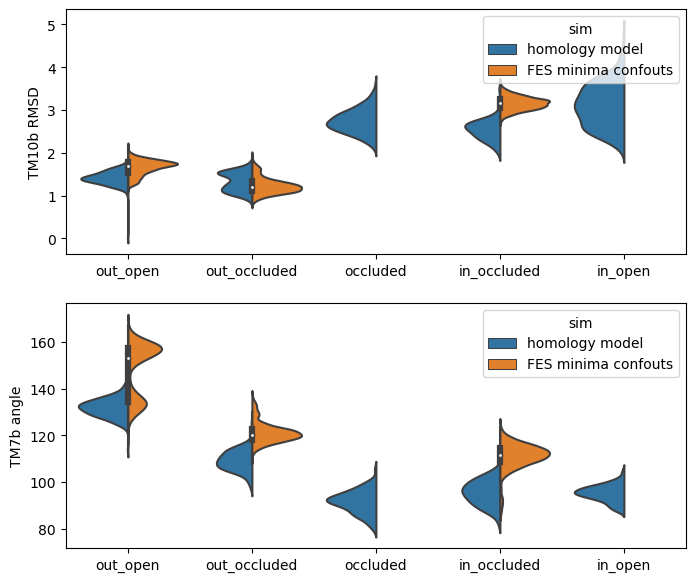

In [88]:
f, ax = plt.subplots(nrows=2,ncols=1, figsize=(8,7))
ax=np.ravel(ax)

sns.violinplot(data=TM10_both_df, x='variable', y='value', hue='sim', split=True, ax=ax[0])
sns.violinplot(data=TM7_both_df, x='variable', y='value', hue='sim', split=True, ax=ax[1])

ax[0].set_ylabel('TM10b RMSD')
ax[1].set_ylabel('TM7b angle')

ax[0].set_xlabel(None)
ax[1].set_xlabel(None)

In [89]:
# here we can see n data points for each of these violins
TM10_both_df.groupby(['variable', 'sim']).count()

value
variable     sim                       
in_occluded  FES minima confouts   3000
             homology model          79
in_open      homology model         275
occluded     homology model         191
out_occluded FES minima confouts   2000
             homology model         149
out_open     FES minima confouts   3000
             homology model         262

In [90]:
TM7_both_df.groupby(['variable', 'sim']).count()

value
variable     sim                       
in_occluded  FES minima confouts   3000
             homology model          79
in_open      homology model         275
occluded     homology model         191
out_occluded FES minima confouts   2000
             homology model         149
out_open     FES minima confouts   3000
             homology model         262

(0.5, 10.0)

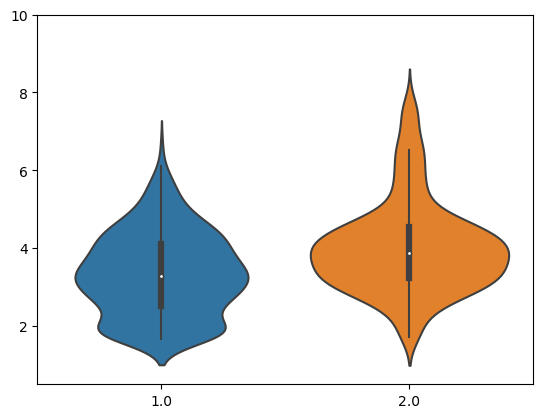

In [281]:
state='occluded'
b1,b2 = get_salt_br(atom_sims_uni[state], skip = 1)
b=np.concatenate((b1,b2))
l=np.concatenate((np.zeros(len(b1))+1, np.zeros(len(b2))+2))

f,ax=plt.subplots(1,1)
sns.violinplot(x=l,y=b, ax=ax)
ax.set_ylim(0.5,10)

In [269]:
u = mda.Universe('../../../GLUT5_atomistic/IN/replica_2/equilibration/minim.gro',\
                '../../../GLUT5_atomistic/IN/replica_2/production/GLUT5_in.2.0_200ns.skip250.xtc')

(0.5, 10.0)

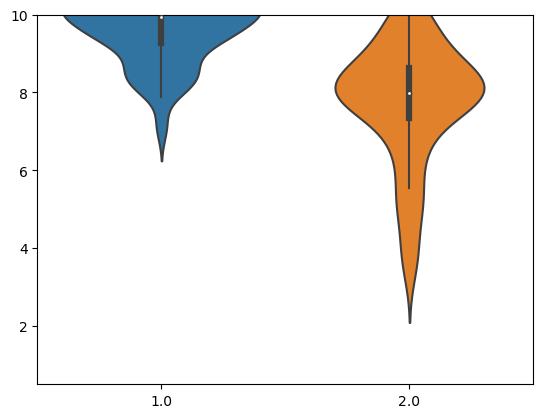

In [270]:
b1,b2 = get_salt_br(u, skip = 1)
b=np.concatenate((b1,b2))
l=np.concatenate((np.zeros(len(b1))+1, np.zeros(len(b2))+2))

f,ax=plt.subplots(1,1)
sns.violinplot(x=l,y=b, ax=ax)
ax.set_ylim(0.5,10)

In [234]:
get_salt_br(atom_strs_uni['in_open'],skip=1)

array([[1.69847272],
       [6.8344418 ]])

In [273]:
def get_salt_brcow(u, skip):
    
    ## first bridge
    bridge1 = []
    bridge2 = []
    
    bridge1_res1 = u.select_atoms('resid 145 and resname GLU')
    bridge1_res2 = u.select_atoms('resid 401 and resname ARG')  #R401 for state dependent, 91 for always
        
    bridge2_res1 = u.select_atoms('resid 394 and resname GLU')
    bridge2_res2 = u.select_atoms('resid 152 and resname ARG') #R152 for state dependent, R334 for always
    #print('this is currently state dependent')
    
    for ts in u.trajectory[::skip]:
        bridge1.append(np.min(d.distance_array(bridge1_res1.positions, bridge1_res2.positions)))
        bridge2.append(np.min(d.distance_array(bridge2_res1.positions, bridge2_res2.positions)))
    
    bridge1 = np.array(bridge1)
    bridge2 = np.array(bridge2)
    
    #return bridge1, bridge2
    bridges = np.vstack((bridge1, bridge2))
    #bridges = np.mean(bridges, axis=0)
    return bridges


In [279]:
u = mda.Universe('/data/GLUT5_cg/old_stuff/GLUT_atomistic/no_ICH5_IN/equilibration/minim.gro',\
                '/data/GLUT5_cg/old_stuff/GLUT_atomistic/no_ICH5_IN/production/GLUT5_noICH5_in.0_200ns.skip100.xtc')

u=mda.Universe('/data/GLUT5_cg/old_stuff/GLUT_atomistic/cow_IN/equilibration/minim.gro',\
              '/data/GLUT5_cg/old_stuff/GLUT_atomistic/cow_IN/production/4yb9_in.0_200ns.skip50.xtc')

u=mda.Universe('/data/GLUT5_cg/old_stuff/GLUT_atomistic/IN/equilibration/minim.gro',\
              '/data/GLUT5_cg/old_stuff/GLUT_atomistic/IN/production/GLUT_in.0_200ns.skip50.xtc')

In [277]:
x=get_salt_brcow(u,skip=1)

(0.5, 10.0)

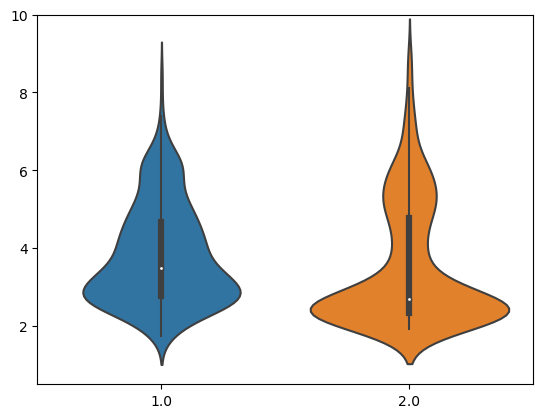

In [280]:
b1,b2 = get_salt_brcow(u, skip = 1)
b=np.concatenate((b1,b2))
l=np.concatenate((np.zeros(len(b1))+1, np.zeros(len(b2))+2))

f,ax=plt.subplots(1,1)
sns.violinplot(x=l,y=b, ax=ax)
ax.set_ylim(0.5,10)

In [255]:
350/5

70.0